<a href="https://colab.research.google.com/github/NadaAdelMousa/Virtual-Try-on/blob/main/Virtual_Try_on.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Virtually Try on:


1.   Run the cells of the first section 'VITON-HD Model'
2.   Use an image url or upload an image for a person
3.   Use an image url or upload an image for a top
4.   Run the cells of Segmentation, cloth mask, Pose
5.   Run the Model and see the result





#VITON-HD Model

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
!git clone https://github.com/shadow2496/VITON-HD.git

Cloning into 'VITON-HD'...
remote: Enumerating objects: 43, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 43 (delta 0), reused 1 (delta 0), pack-reused 40
Unpacking objects: 100% (43/43), done.


In [ ]:
!rm -r /content/sample_data
%cd VITON-HD 

/content/VITON-HD


In [ ]:
pip install opencv-python torchgeometry

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 42 kB 366 kB/s 


In [ ]:
ls

assets/       datasets/    LICENSE      README.md  utils.py
checkpoints/  datasets.py  networks.py  test.py


In [ ]:
# checkpoints alias 
import gdown

url = 'https://drive.google.com/uc?id=1cAUuGnK1jY_69YQuaqIJ2EJLL5bLYKVN'
output = 'checkpoints/alias_final.pth'
gdown.download(url, output, quiet=False)
#https://drive.google.com/file/d/1cAUuGnK1jY_69YQuaqIJ2EJLL5bLYKVN/view?usp=sharing

Downloading...
From: https://drive.google.com/uc?id=1cAUuGnK1jY_69YQuaqIJ2EJLL5bLYKVN
To: /content/VITON-HD/checkpoints/alias_final.pth
100%|██████████| 402M/402M [00:05<00:00, 73.7MB/s]


'checkpoints/alias_final.pth'

In [ ]:
# checkpoints gmm 
import gdown

url = 'https://drive.google.com/uc?id=1W8teZFz_I4wZCasTQIsGa6el1HB4Vw8b'
output = 'checkpoints/gmm_final.pth'
gdown.download(url, output, quiet=False)
#https://drive.google.com/file/d/1W8teZFz_I4wZCasTQIsGa6el1HB4Vw8b/view?usp=sharing

Downloading...
From: https://drive.google.com/uc?id=1W8teZFz_I4wZCasTQIsGa6el1HB4Vw8b
To: /content/VITON-HD/checkpoints/gmm_final.pth
100%|██████████| 76.2M/76.2M [00:01<00:00, 75.0MB/s]


'checkpoints/gmm_final.pth'

In [ ]:
# checkpoints seg 
import gdown

url = 'https://drive.google.com/uc?id=1Nai8ladjicPGrXGHDFxrGo-u2iSsAWSV'
output = 'checkpoints/seg_final.pth'
gdown.download(url, output, quiet=False)
#https://drive.google.com/file/d/1Nai8ladjicPGrXGHDFxrGo-u2iSsAWSV/view?usp=sharing

Downloading...
From: https://drive.google.com/uc?id=1Nai8ladjicPGrXGHDFxrGo-u2iSsAWSV
To: /content/VITON-HD/checkpoints/seg_final.pth
100%|██████████| 138M/138M [00:01<00:00, 79.4MB/s]


'checkpoints/seg_final.pth'

#Get the data

In [ ]:
# use any image url for a person and a clothing item
person_img_url = 'https://i.pinimg.com/736x/69/ff/0d/69ff0d2a00a3ec4e023b9672196a95de.jpg'
cloth_img_url = 'https://4.imimg.com/data4/TJ/FB/MY-19064418/kids-top-500x500.jpg'

In [ ]:
%cd datasets
with open('test_pairs.txt', 'w') as f:
    f.write('person1.jpg cloth1.jpg')

/content/VITON-HD/datasets


In [ ]:
!mkdir test
%cd test
!mkdir cloth
!mkdir cloth-mask
!mkdir image
!mkdir image-parse
!mkdir openpose-img
!mkdir openpose-json

/content/VITON-HD/datasets/test


In [ ]:
# run this cell if you're getting images from urls
# otherwise upload your images with names 'person1.jpg' 'cloth1.jpg'
#                                      to 'VITON-HD/datasets/test/image' , 'VITON-HD/datasets/test/cloth'
import requests

img_data = requests.get(person_img_url).content
with open('/content/img1.jpg', 'wb+') as handler:
    handler.write(img_data)


img_data = requests.get(cloth_img_url).content
with open('/content/img2.jpg', 'wb+') as handler:
    handler.write(img_data)

In [ ]:
person_img_path = '/content/VITON-HD/datasets/test/image/person1.jpg'
cloth_img_path = '/content/VITON-HD/datasets/test/cloth/cloth1.jpg'

In [ ]:
img = Image.open('/content/img1.jpg').resize((768, 1024))
img.save(person_img_path)

img = Image.open('/content/img2.jpg').resize((768, 1024))
img.save(cloth_img_path)

##Segmentation

In [ ]:
!pip install ninja

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 108 kB 35.7 MB/s 


In [ ]:
%cd /content/

/content


In [ ]:
!git clone https://github.com/PeikeLi/Self-Correction-Human-Parsing
%cd Self-Correction-Human-Parsing
!mkdir checkpoints

Cloning into 'Self-Correction-Human-Parsing'...
remote: Enumerating objects: 719, done.
remote: Counting objects: 100% (69/69), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 719 (delta 41), reused 32 (delta 32), pack-reused 650
Receiving objects: 100% (719/719), 3.79 MiB | 30.78 MiB/s, done.
Resolving deltas: 100% (153/153), done.
/content/Self-Correction-Human-Parsing


In [ ]:
%cd Self-Correction-Human-Parsing

/content/Self-Correction-Human-Parsing


In [ ]:
dataset = 'lip'         #select from ['lip', 'atr', 'pascal']

In [ ]:
if dataset == 'lip':
    url = 'https://drive.google.com/uc?id=1k4dllHpu0bdx38J7H28rVVLpU-kOHmnH'
elif dataset == 'atr':
    url = 'https://drive.google.com/uc?id=1ruJg4lqR_jgQPj-9K0PP-L2vJERYOxLP'
elif dataset == 'pascal':
    url = 'https://drive.google.com/uc?id=1E5YwNKW2VOEayK9mWCS3Kpsxf-3z04ZE'

output = 'checkpoints/final.pth'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1k4dllHpu0bdx38J7H28rVVLpU-kOHmnH
To: /content/Self-Correction-Human-Parsing/checkpoints/final.pth
100%|██████████| 267M/267M [00:01<00:00, 174MB/s]


'checkpoints/final.pth'

In [ ]:
!python3 simple_extractor.py \
         --dataset 'lip' \
         --model-restore 'checkpoints/final.pth' \
         --input-dir '/content/VITON-HD/datasets/test/image'  \
         --output-dir '/content/VITON-HD/datasets/test/image-parse'

Evaluating total class number 20 with ['Background', 'Hat', 'Hair', 'Glove', 'Sunglasses', 'Upper-clothes', 'Dress', 'Coat', 'Socks', 'Pants', 'Jumpsuits', 'Scarf', 'Skirt', 'Face', 'Left-arm', 'Right-arm', 'Left-leg', 'Right-leg', 'Left-shoe', 'Right-shoe']
 50% 1/2 [00:01<00:01,  1.86s/it]
Traceback (most recent call last):
  File "simple_extractor.py", line 155, in <module>
    main()
  File "simple_extractor.py", line 128, in main
    for idx, batch in enumerate(tqdm(dataloader)):
  File "/usr/local/lib/python3.7/dist-packages/tqdm/std.py", line 1195, in __iter__
    for obj in iterable:
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 652, in __next__
    data = self._next_data()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 692, in _next_data
    data = self._dataset_fetcher.fetch(index)  # may raise StopIteration
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/_utils/fetch.py", line 49, in

##cloth mask

In [ ]:
im_parse = Image.open(cloth_img_path).convert('L') 
cloth_array = np.array(im_parse) 
cloth_mask = (cloth_array < 240)

In [ ]:
im = Image.fromarray(cloth_mask)
im.save('/content/VITON-HD/datasets/test/cloth-mask/cloth1.jpg')

##Pose

In [ ]:
%cd /content/
import os
from os.path import exists, join, basename, splitext

git_repo_url = 'https://github.com/CMU-Perceptual-Computing-Lab/openpose.git'
project_name = splitext(basename(git_repo_url))[0]
if not exists(project_name):
  # see: https://github.com/CMU-Perceptual-Computing-Lab/openpose/issues/949
  # install new CMake becaue of CUDA10
  !wget -q https://cmake.org/files/v3.13/cmake-3.13.0-Linux-x86_64.tar.gz
  !tar xfz cmake-3.13.0-Linux-x86_64.tar.gz --strip-components=1 -C /usr/local
  # clone openpose
  !git clone -q --depth 1 $git_repo_url
  !sed -i 's/execute_process(COMMAND git checkout master WORKING_DIRECTORY ${CMAKE_SOURCE_DIR}\/3rdparty\/caffe)/execute_process(COMMAND git checkout f019d0dfe86f49d1140961f8c7dec22130c83154 WORKING_DIRECTORY ${CMAKE_SOURCE_DIR}\/3rdparty\/caffe)/g' openpose/CMakeLists.txt
  # install system dependencies
  !apt-get -qq install -y libatlas-base-dev libprotobuf-dev libleveldb-dev libsnappy-dev libhdf5-serial-dev protobuf-compiler libgflags-dev libgoogle-glog-dev liblmdb-dev opencl-headers ocl-icd-opencl-dev libviennacl-dev
  # install python dependencies
  !pip install -q youtube-dl
  # build openpose
  !cd openpose && rm -rf build || true && mkdir build && cd build && cmake .. && make -j`nproc`
  
from IPython.display import YouTubeVideo

[Errno 2] No such file or directory: '/contents/'
/content/Self-Correction-Human-Parsing
Selecting previously unselected package libgflags2.2.
(Reading database ... 155680 files and directories currently installed.)
Preparing to unpack .../00-libgflags2.2_2.2.1-1_amd64.deb ...
Unpacking libgflags2.2 (2.2.1-1) ...
Selecting previously unselected package libgflags-dev.
Preparing to unpack .../01-libgflags-dev_2.2.1-1_amd64.deb ...
Unpacking libgflags-dev (2.2.1-1) ...
Selecting previously unselected package libgoogle-glog0v5.
Preparing to unpack .../02-libgoogle-glog0v5_0.3.5-1_amd64.deb ...
Unpacking libgoogle-glog0v5 (0.3.5-1) ...
Selecting previously unselected package libgoogle-glog-dev.
Preparing to unpack .../03-libgoogle-glog-dev_0.3.5-1_amd64.deb ...
Unpacking libgoogle-glog-dev (0.3.5-1) ...
Selecting previously unselected package libhdf5-serial-dev.
Preparing to unpack .../04-libhdf5-serial-dev_1.10.0-patch1+docs-4_all.deb ...
Unpacking libhdf5-serial-dev (1.10.0-patch1+docs-4)

In [ ]:
!cd /content/Self-Correction-Human-Parsing/openpose && ./build/examples/openpose/openpose.bin \
            --image_dir '/content/VITON-HD/datasets/test/image'  \
            --write_json '/content/VITON-HD/datasets/test/openpose-json'  \
            --display 0 --write_images '/content/VITON-HD/datasets/test/openpose-img'  \
            --disable_blending --hand --render_pose 1

Starting OpenPose demo...
Configuring OpenPose...
Starting thread(s)...
Auto-detecting all available GPUs... Detected 1 GPU(s), using 1 of them starting at GPU 0.
OpenPose demo successfully finished. Total time: 4.627707 seconds.


#Run the Model

In [ ]:
cd /content/VITON-HD

/content/VITON-HD


In [ ]:
ls

assets/       datasets/    LICENSE      __pycache__/  test.py
checkpoints/  datasets.py  networks.py  README.md     utils.py


In [ ]:
CUDA_VISIBLE_DEVICES=0

In [ ]:
!python /content/VITON-HD/test.py --name testiii

Namespace(alias_checkpoint='alias_final.pth', batch_size=1, checkpoint_dir='./checkpoints/', dataset_dir='./datasets/', dataset_list='test_pairs.txt', dataset_mode='test', display_freq=1, gmm_checkpoint='gmm_final.pth', grid_size=5, init_type='xavier', init_variance=0.02, load_height=1024, load_width=768, name='testiii', ngf=64, norm_G='spectralaliasinstance', num_upsampling_layers='most', save_dir='./results/', seg_checkpoint='seg_final.pth', semantic_nc=13, shuffle=False, workers=1)
Network [SegGenerator] was created. Total number of parameters: 34.5 million. To see the architecture, do print(network).
Network [ALIASGenerator] was created. Total number of parameters: 100.5 million. To see the architecture, do print(network).
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:333: UserWarning: Argument 'interpolation' of type int is deprecated since 0.13 and will be removed in 0.15. Please use InterpolationMode enum.
  "Argument 'interpolation' of type int is 

In [ ]:
ls results/testiii/

person1.jpg_cloth1.jpg


In [ ]:
import cv2

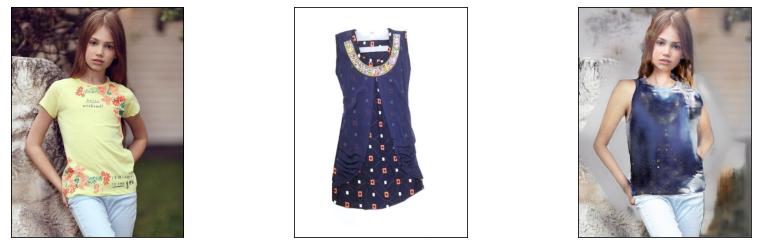

In [ ]:
fig = plt.figure(figsize=(50,50))
fig.add_subplot(10, 10, 1 , xticks=[], yticks=[])
image = cv2.imread(person_img_path)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

fig.add_subplot(10, 10, 2 , xticks=[], yticks=[])
image = cv2.imread(cloth_img_path)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

fig.add_subplot(10, 10, 3 , xticks=[], yticks=[])
image = cv2.imread('/content/VITON-HD/results/testiii/person1.jpg_cloth1.jpg')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))